In [1]:
%pylab inline
%config InlineBackend.figure_format = 'retina'
from utils import *

Populating the interactive namespace from numpy and matplotlib


# The purpose of this notebook is to show:
1. how to load the pretrained model (i.e., DNN decoder).
2. how to load and visualize the population vectors (`PV`).
3. convert `PV`:(N_samples, N_neurons) into `X`:(N_samples, B_bins, N_neurons) using function `pv_2_spv` , `X` is the decoder input.
4. how to use the pretrained model to decode the locations (`redec_pos`) from PVs using same parameters/procedure as the real-time decoding.
5. compare the offline decoding result (`redec_pos`) with the stored real-time decoding result (`dec_pos`).

This notebook uses **Jumper** task data

## wr112

In [2]:
model, neuron_idx, B_bins = load_pretrained_model(rat='rat1', task='Jumper')
model.cuda();

In [3]:
# model.load_state_dict(torch.load('./pretrained_model/wr112_0905_offline_model_1.pth'))

In [4]:
pv = np.load('./data/Jumper/wr112_0905_Jumper_PV.npy')
pv_t = np.load('./data/Jumper/wr112_0905_Jumper_PV_t.npy')
dec_pos = np.load('./data/Jumper/wr112_0905_Jumper_dec_pos.npy')

In [5]:
pv.shape

(19317, 157)

In [6]:
pv.shape, pv_t.shape, dec_pos.shape, pv.shape[0] - dec_pos.shape[0]

((19317, 157), (19317,), (19268, 2), 49)

In [7]:
# dec_pos = gaussian_filter1d(dec_pos, sigma=10, axis=0)

In [8]:
X = pv_2_spv(pv, B_bins=B_bins)
X.shape

(19268, 50, 157)

In [9]:
@interact(i = (B_bins, X.shape[0]-1))
def visualiz_pv(i=B_bins-1):
    fig, ax = plt.subplots(1, 1, figsize=(X.shape[2]//20, X.shape[1]//20))
    ax.imshow(X[i], aspect='auto', cmap=neo)
    ax.set_xlabel('place units')
    ax.set_ylabel('time bins')
    plt.show();

interactive(children=(IntSlider(value=50, description='i', max=19267, min=50), Output()), _dom_classes=('widge…

In [10]:
redec_pos = decode(model, X, neuron_idx, cuda=True, mimic_realtime=True)
# redec_pos = decode(model, X, neuron_idx, cuda=True, mimic_realtime=False, smooth=False)

In [39]:
print(f'euclidean distance between offline and online decoding results: {np.percentile(np.linalg.norm(redec_pos - dec_pos, axis=1), 100) * 10: .1f} mm')

euclidean distance between offline and online decoding results:  0.0 mm


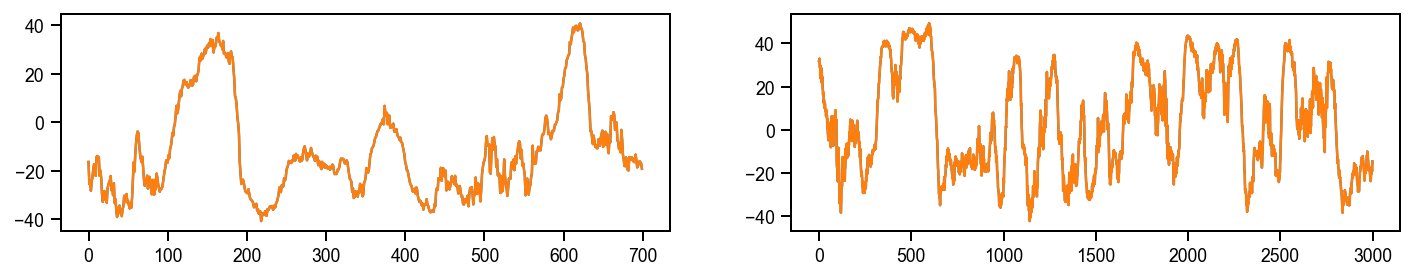

In [12]:
fig, ax = plt.subplots(1,2, figsize=(12,2))
ax[0].plot(redec_pos[2500:3200, 0]);
ax[0].plot(dec_pos[2500:3200, 0]);
ax[1].plot(redec_pos[-3000:, 0]);
ax[1].plot(dec_pos[-3000:, 0]);

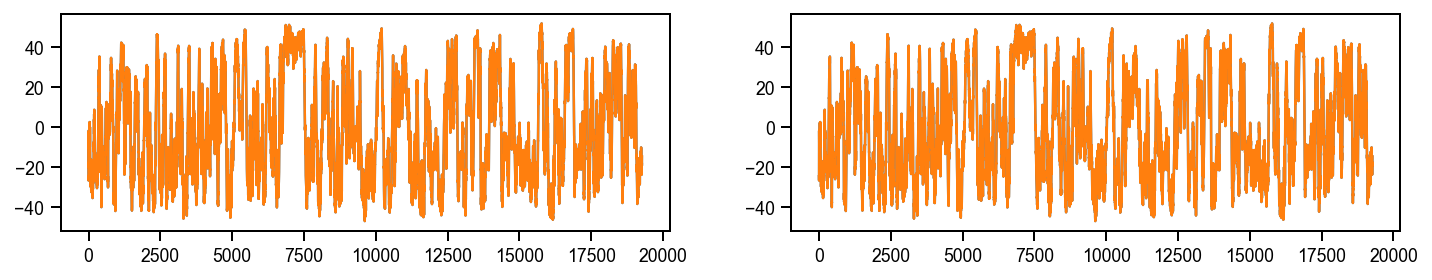

In [13]:
fig, ax = plt.subplots(1,2, figsize=(12,2))
ax[0].plot(redec_pos[:, 0]);
ax[0].plot(dec_pos[:, 0]);
ax[1].plot(redec_pos[:, 0]);
ax[1].plot(dec_pos[:, 0]);

In [14]:
pv_t.shape, pv.shape, dec_pos.shape, redec_pos.shape

((19317,), (19317, 157), (19268, 2), (19268, 2))

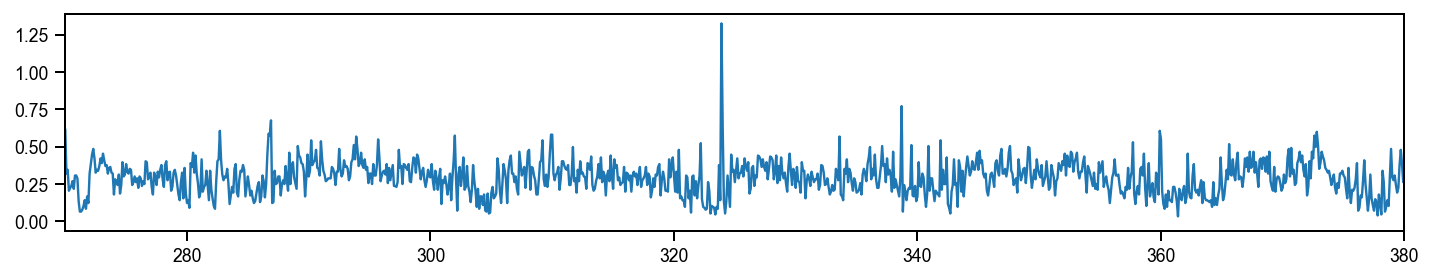

In [15]:
plt.figure(figsize=(12,2))
plt.plot(pv_t, pv.mean(axis=1));
plt.xlim([270, 380]);

## wr118

In [16]:
model, neuron_idx, B_bins = load_pretrained_model(rat='rat2', task='Jumper')
model.cuda();

In [17]:
pv = np.load('./data/Jumper/wr118_0821_Jumper_PV.npy')
pv_t = np.load('./data/Jumper/wr118_0821_Jumper_PV_t.npy')
dec_pos = np.load('./data/Jumper/wr118_0821_Jumper_dec_pos.npy')

In [18]:
pv.shape[0], pv_t.shape[0], dec_pos.shape[0], pv.shape[0] - dec_pos.shape[0]

(18894, 18894, 18845, 49)

In [19]:
X = pv_2_spv(pv, B_bins=B_bins)
X.shape

(18845, 50, 373)

In [21]:
@interact(i = (B_bins, X.shape[0]-1))
def visualiz_pv(i=B_bins-1):
    fig, ax = plt.subplots(1,1, figsize=(X.shape[2]//20, X.shape[1]//20))
    ax.imshow(X[i], aspect='auto', cmap=neo)
    ax.set_xlabel('place units')
    ax.set_ylabel('time bins')
    plt.show();


interactive(children=(IntSlider(value=50, description='i', max=18844, min=50), Output()), _dom_classes=('widge…

In [22]:
redec_pos = decode(model, X, neuron_idx, cuda=True, mimic_realtime=True)

In [23]:
print(f'euclidean distance between offline and online decoding results: {np.percentile(np.linalg.norm(redec_pos - dec_pos, axis=1), 100) * 10: .1f} mm')

euclidean distance between offline and online decoding results:  0.0 mm


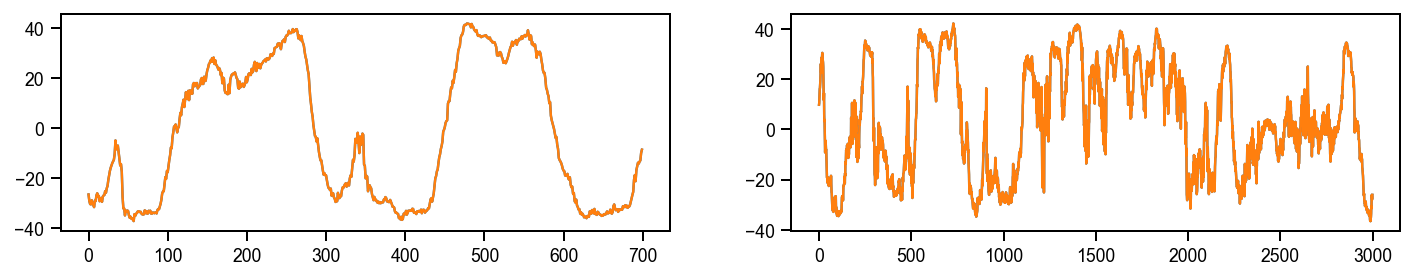

In [24]:
fig, ax = plt.subplots(1,2, figsize=(12,2))
ax[0].plot(redec_pos[2500:3200, 0]);
ax[0].plot(dec_pos[2500:3200, 0]);
ax[1].plot(redec_pos[-3000:, 0]);
ax[1].plot(dec_pos[-3000:, 0]);

In [25]:
pv_t.shape, pv.shape, dec_pos.shape, redec_pos.shape

((18894,), (18894, 373), (18845, 2), (18845, 2))

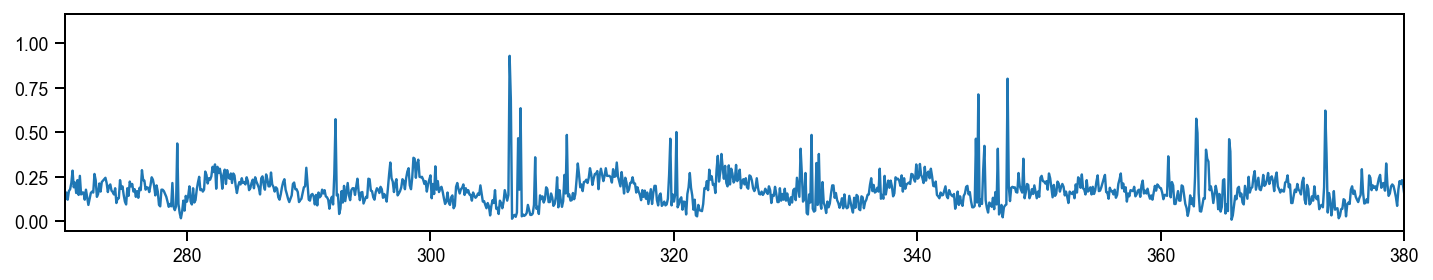

In [26]:
plt.figure(figsize=(12,2))
plt.plot(pv_t, pv.mean(axis=1));
plt.xlim([270, 380]);

## wr121

In [27]:
model, neuron_idx, B_bins = load_pretrained_model(rat='rat3', task='Jumper')
model.cuda();

In [28]:
pv = np.load('./data/Jumper/wr121_0927_Jumper_PV.npy')
pv_t = np.load('./data/Jumper/wr121_0927_Jumper_PV_t.npy')
dec_pos = np.load('./data/Jumper/wr121_0927_Jumper_dec_pos.npy')
neuron_idx = np.load('./data/Jumper/wr121_0927_place_units_id.npy')

In [29]:
pv.shape[0], pv_t.shape[0], dec_pos.shape[0], pv.shape[0] - dec_pos.shape[0]

(22617, 22617, 22603, 14)

In [30]:
X = pv_2_spv(pv, B_bins=B_bins)
X.shape

(22603, 15, 233)

In [31]:
@interact(i = (B_bins, X.shape[0]-1))
def visualiz_pv(i=B_bins-1):
    fig, ax = plt.subplots(1,1, figsize=(X.shape[2]//20, X.shape[1]//10))
    ax.imshow(X[i], aspect='auto', cmap=neo)
    ax.set_xlabel('place units')
    ax.set_ylabel('time bins')
    plt.show();

interactive(children=(IntSlider(value=15, description='i', max=22602, min=15), Output()), _dom_classes=('widge…

In [33]:
redec_pos = decode(model, X, neuron_idx, cuda=True, mimic_realtime=True)

In [38]:
print(f'euclidean distance between offline and online decoding results: {np.percentile(np.linalg.norm(redec_pos - dec_pos, axis=1), 100) * 10: .1f} mm')

euclidean distance between offline and online decoding results:  0.0 mm


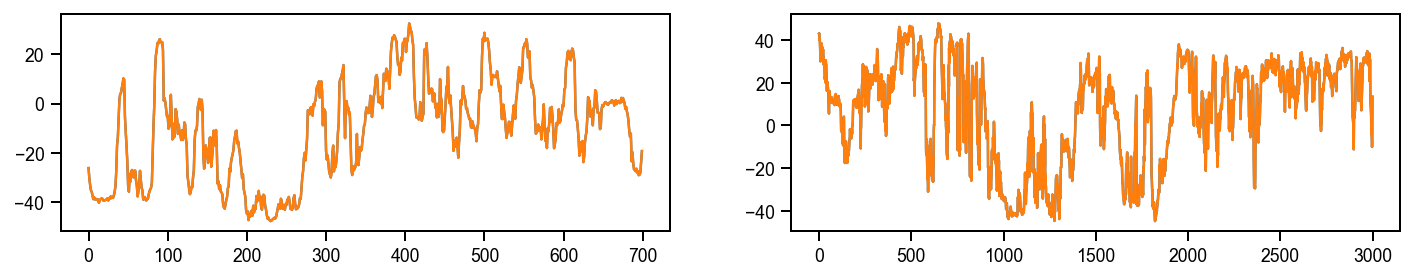

In [35]:
fig, ax = plt.subplots(1,2, figsize=(12,2))
ax[0].plot(redec_pos[2500:3200, 0]);
ax[0].plot(dec_pos[2500:3200, 0]);
ax[1].plot(redec_pos[-3000:, 0]);
ax[1].plot(dec_pos[-3000:, 0]);

In [36]:
pv_t.shape, pv.shape, dec_pos.shape, redec_pos.shape

((22617,), (22617, 233), (22603, 2), (22603, 2))

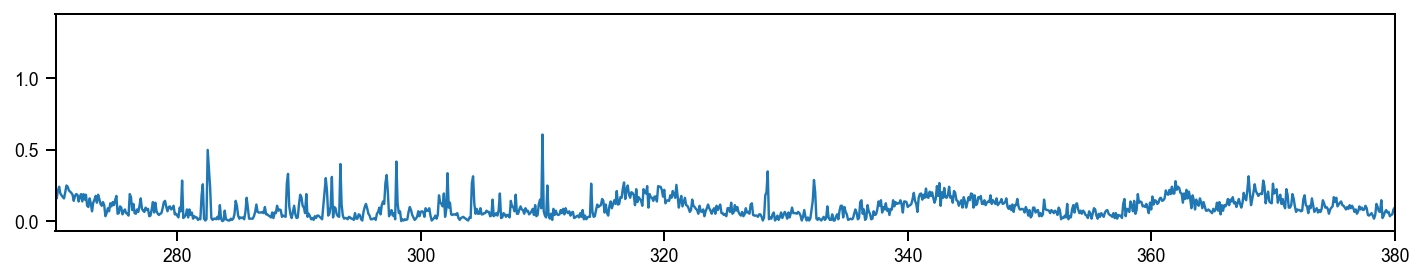

In [37]:
plt.figure(figsize=(12,2))
plt.plot(pv_t, pv.mean(axis=1));
plt.xlim([270, 380]);